In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
file_path= r"C:\Users\Chinmay\Downloads\archive\boston.csv"

## 1. Include basic data-preprocessing steps 

In [16]:
#1.TO LOAD THE DATASET 
data = pd.read_csv(r'C:\Users\Chinmay\Downloads\archive\boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [45]:
# 2. Analysis of dataset
print(data.dtypes)
print(data.shape)


CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object
(506, 14)


#3. Inspecting data

print(data.head(8))
print(data.info())
print(data.describe())

In [27]:
#4. To check for any missing  values ( to fill or drop any missing values)
data.isnull().sum()


#We observe that there are no impurities, so no need of handling any missing values|

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [34]:
# 5. splitting into features and target

x=data.drop('MEDV', axis=1)  #Features - all coloumns excluding MEDV
y=data['MEDV']               #Target - coloumn of home prices

print("Shape of X (features):", x.shape)
print("Shape of y (target):", y.shape)

Shape of X (features): (506, 13)
Shape of y (target): (506,)


## 2. Train the regression model & use appropriate loss functions for updating the parameters


In [51]:
#before we do that, first let us define which is dependent and independent variables in the question.
data_ = data.loc[:,['LSTAT', 'MEDV']]
data_.head(5)

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


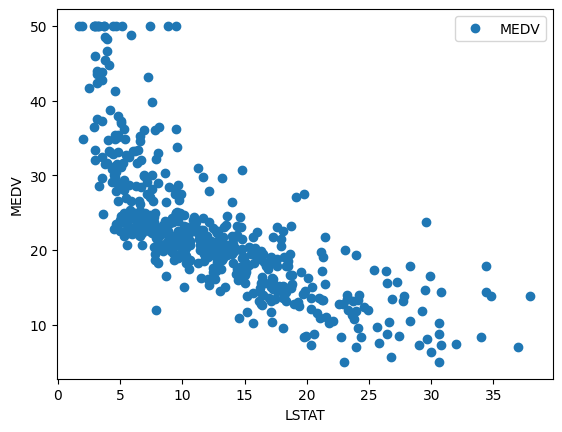

In [52]:
#if we make a scatterplot it will be better to understand the relationship between dependent and independent variable.
import matplotlib.pyplot as plt
%matplotlib inline

data.plot(x='LSTAT', y='MEDV', style='o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

#inverse relationship - as population % below the poverty line increases the median value of price of the house decrases

In [53]:
#preparing dataset
x=pd.DataFrame(data['LSTAT'])
y=pd.DataFrame(data['MEDV'])


In [54]:
x.size, y.size


(506, 506)

In [7]:
#Separating features and target
import numpy as np
import pandas as pd

x=data.drop('MEDV', axis=1)
y=data['MEDV']

indices=np.arange(len(x))
np.random.seed(1)

indices=np.arange(len(x))
np.random.seed(1)
np.random.shuffle(indices)

#now we split them into training and testing models(training- 80% and testing- 20%)
test_size= int(0.2*len(x))
train_size= len(x) - test_size
x_train, x_test = x.iloc[indices[:train_size]], x.iloc[indices[:test_size]]
y_train, y_test = y.iloc[indices[:train_size]], y.iloc[indices[:test_size]]

In [8]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (405, 13)
x_test shape: (101, 13)
y_train shape: (405,)
y_test shape: (101,)


## 3. To Evaluate performance metrics


In [27]:
import numpy as np
import pandas as pd

# 1. First we calculate mean squared error(MSE)
data = pd.read_csv(r'C:\Users\Chinmay\Downloads\archive\boston.csv')
x=data.drop('MEDV', axis=1)
y=data['MEDV']

# Below code is to define y_train
indices=np.arange(len(x))
np.random.seed(1)
np.random.shuffle(indices)

test_size= int(0.2*len(x))
train_size= len(x) - test_size
x_train, x_test = x.iloc[indices[:train_size]], x.iloc[indices[:test_size]]
y_train, y_test = y.iloc[indices[:train_size]], y.iloc[indices[:test_size]]

# But we also need predicted y value(predicted house prices)
# So lets build a model for that

# we have to add intercept coloumn first.
x_train= np.c_[np.ones((x_train.shape[0],1)), x_train]
x_test = np.c_[np.ones((x_test.shape[0],1)), x_test]

#Normal Equation, we calculate model coeff.
theta =np.linalg.inv(x_train.T@ x_train)@ x_train.T @ y_train

y_pred_train= x_train@theta
y_pred_test= x_test@theta

#Now we wiwll be able to calculate Mean squared Error(MSE)

mse_train=np.mean((y_train-y_pred_train)**2)
mse_test=np.mean((y_test -y_pred_test)**2)

print("Coefficients (theta):", theta)
print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)

# To calculate RMSE( Root mean squared value)
rmse_test=np.sqrt(mse_train)
rmse_train=np.sqrt(mse_test)
print("RMSE(training):", rmse_train)
print("RMSE(testing):", rmse_test)

# To calculate MAE( Mean absolute error)
mae_train = np.mean(np.abs(y_train - y_pred_train))  
mae_test = np.mean(np.abs(y_test - y_pred_test))
print("MAE (Training):", mae_train)
print("MAE (Testing):", mae_test)

# To calculate R^2 score

ss_total_train=np.sum((y_train- np.mean(y_train))**2)
ss_residual_train= np.sum((y_train - y_pred_train)**2)
r2_train= 1-(ss_residual_train/ ss_total_train)

ss_total_test=np.sum((y_test- np.mean(y_test))**2)
ss_residual_test= np.sum((y_test - y_pred_test)**2)
r2_test= 1-(ss_residual_test/ ss_total_test)

print("R^2 score(Training):", r2_train)
print("R^2 score(Testing):", r2_test)



Coefficients (theta): [ 3.40927058e+01 -1.05194855e-01  4.35727577e-02 -1.12507220e-02
  3.02731576e+00 -1.57959546e+01  3.92834231e+00 -7.28934953e-03
 -1.49745275e+00  3.16293037e-01 -1.26810336e-02 -8.96097520e-01
  1.00616901e-02 -5.13221638e-01]
Training MSE: 21.60710209585017
Testing MSE: 20.688309195183976
RMSE(training): 4.548440303574839
RMSE(testing): 4.64834401651278
MAE (Training): 3.2606721491159854
MAE (Testing): 3.5586838608253197
R^2 score(Training): 0.7408720736292147
R^2 score(Testing): 0.7916400380952628


## 4. Define a function that takes the input attributes as a list and return the output using the trained model

In [104]:
theta = np.linalg.inv(x_train[:, 1:].T @ x_train[:, 1:]) @ x_train[:, 1:].T @ y_train
theta = np.insert(theta, 0, np.mean(y_train))  

print("Scaled Sample Shape:", scaled_sample_with_intercept.shape)  
print("Theta Shape:", theta.shape) 


Scaled Sample Shape: (1, 14)
Theta Shape: (14,)


In [102]:
import numpy as np
data = pd.read_csv(r'C:\Users\Chinmay\Downloads\archive\boston.csv')
x=data.drop('MEDV', axis=1)
y=data['MEDV']

indices=np.arange(len(x))
np.random.seed(1)
np.random.shuffle(indices)

test_size= int(0.2*len(x))
train_size= len(x) - test_size
x_train, x_test = x.iloc[indices[:train_size]], x.iloc[indices[:test_size]]
y_train, y_test = y.iloc[indices[:train_size]], y.iloc[indices[:test_size]]

x_train= np.c_[np.ones((x_train.shape[0],1)), x_train]
x_test = np.c_[np.ones((x_test.shape[0],1)), x_test]

theta = np.linalg.inv(x_train[:, 1:].T @ x_train[:, 1:]) @ x_train[:, 1:].T @ y_train
theta = np.insert(theta, 0, np.mean(y_train))

y_pred_train= x_train@theta
y_pred_test= x_test@theta

mean = x_train[:, 1:].mean(axis=0)  
std = x_train[:, 1:].std(axis=0) 


#lets create a function for prediction
def predict_boston_price(input_attributes):

    #convert the list into a numpy array and then we add intercept term
    #input array ----> X

    x= np.array(input_attributes).reshape(1,-1)
    x_containing_intercept= np.c_[np.ones((1,1)),X]  
    
    #lets make prediction using the model we trained above
    price = X_containing_intercept@theta
    return price[0]

#If we take a random dataset and try to find predicted price, we will get inaccurate and negative predictions.
# Thats why we have to scale the sample data, using Mean and Standard deviation of training data

train_mean= x_train.mean(axis=0)
train_std= x_train.std(axis=0)


#function to scale sample data
def scale_sample(sample, mean, std):
    sample = np.array(sample).reshape(1,-1)
    scaled_sample = (sample - mean) / std
    return scaled_sample

def predict_boston_price(input_attributes):
    x = np.array(input_attributes).reshape(1, -1) 
    x_with_intercept = np.c_[np.ones((x.shape[0], 1)), x] 
    return (x_with_intercept @ theta)[0] 

train_mean = x_train[:, 1:].mean(axis=0)  
train_std = x_train[:, 1:].std(axis=0)  

#sample data which we manually took and not the boston dataset
sample_data = [1.53837, 45.0234, 39.123, 89.2945, 78.8182, 105.567, 5.296, 
               18.897, 23.3333, 333.543, 90.123, 120.1253, 360.1834]


#Scale the sample data
scaled_sample = scale_sample(sample_data, mean, std)

#Add intercept term back
scaled_sample_with_intercept = np.c_[np.ones((scaled_sample.shape[0], 1)), scaled_sample]

predicted_price= predict_boston_price(scaled_sample)

print("Predicted Price:", predicted_price)

Predicted Price: 500.12329165744836
